###**GRADIENT DESCENT MULTIPLAS VARIAVEIS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

%matplotlib inline

###**ABRINDO DATAFRAME DE PREÇOS DE APARTAMENTOS**

In [2]:
df = pd.read_csv('prices.csv')
df.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


**PRÉ-PROCESSAMENTO**

Standard score

In [3]:
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,size,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


**PEGANDO O NÚMERO DE FEATURES**

In [4]:
n_features = len(df_norm.columns)-1 ## desconsiderando o target 'price'
n_features

2

**CRIANDO UM VETOR DE W's BASEADO NA QUANTIDADE DE FEATURES**

In [5]:
w = np.random.rand(1,n_features+1) ## Gerando valores aleatórios entre 0 e 1
w

array([[0.24340876, 0.98458201, 0.13807924]])

**TRANSFORMANDO O DATAFRAME EM NUMPY X,y**

In [6]:
X = np.array(df_norm.drop('price', axis=1))
y = df_norm.iloc[:, 2:3].values

**CRIANDO X-zero COM VALORES=1**

In [7]:
## criando uma função
def insert_ones(X):
    ones = np.ones([X.shape[0],1])
    return np.concatenate((ones,X), axis=1)

**DEFININDO CUSTO**

In [8]:
def custo(w, X, y):
    m = len(X)
    
    erro = (X@w.T - y)
    
    custo = np.sum(np.power(erro,2))
    
    return custo/m

**GRADIENT DESCENT**

In [9]:
def gradient_descent(w, X, y, alpha, epoch):
    cost = np.zeros(epoch)
    
    for i in range(epoch):
        
        w = w - (alpha/len(X)) * np.sum((X@w.T - y)*X, axis=0)
        
        cost[i] = custo(w, X, y)
        
    return w, cost

**INICIALIZANDO**

In [10]:
X = insert_ones(X)

alpha = 0.01
epoch = 800

**RODANDO TUDO**

In [11]:
w, cost = gradient_descent(w, X, y, alpha, epoch)

**CUSTO FINAL**

In [12]:
custo(w, X, y)

0.26137477165954276

**MOSTRANDO O CUSTO**

Text(0.5, 1.0, 'Erro vs. Epoch')

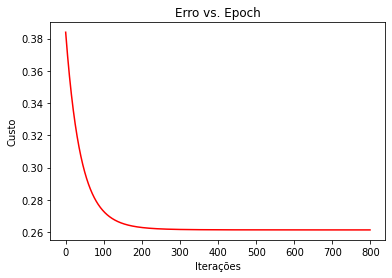

In [13]:
#plotando o custo
fig, ax = plt.subplots()
ax.plot(np.arange(epoch), cost, 'r')
ax.set_xlabel('Iterações')
ax.set_ylabel('Custo')
ax.set_title('Erro vs. Epoch')

**MOSTRANDO OS PESOS**

In [14]:
w

array([[ 7.84317446e-05,  8.83319265e-01, -5.17307835e-02]])